<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/data-analysis/MATPLOTLIB_%2B_NUMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [366]:
addNum = [random.randint(95,100) for a in range(40)]
arrNum = [random.randint(50,60) for a in range(40)]
arrNum2 = [random.randint(30,40) for a in range(40)]
arrNum3 = [random.randint(10,20) for a in range(40)]

xList = [x for x in range(1,41)]

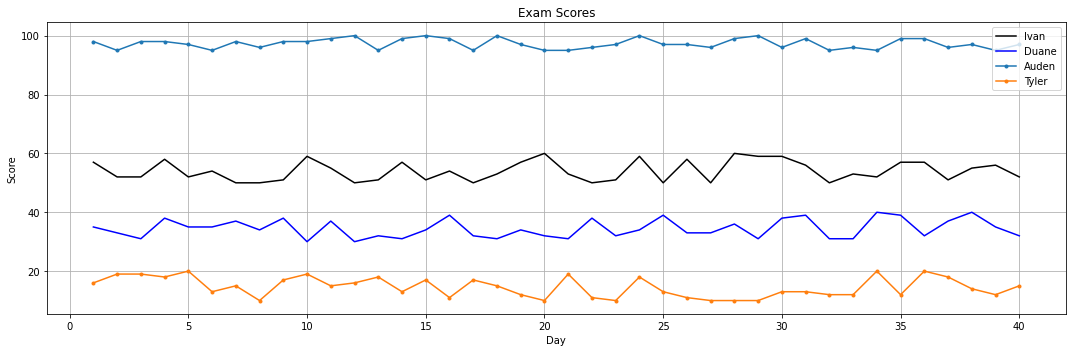

In [367]:
plt.figure(figsize=(15,5))


plt.plot(xList, arrNum, color='k', label='Ivan')
plt.plot(xList, arrNum2, color='b', label='Duane')
plt.plot(xList, addNum, marker='.', label='Auden')
plt.plot(xList, arrNum3, marker='.', label='Tyler')


plt.xlabel('Day')
plt.ylabel('Score')

plt.title('Exam Scores')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



In [368]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/report.csv')
df.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [369]:
columnsWithNan = ['population', 'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies', 'months_reported', 'crimes_percapita', 'homicides_percapita', 'rapes_percapita', 'assaults_percapita', 'robberies_percapita']
for c in columnsWithNan:
  df[c].fillna(df[c].median(), inplace=True)

In [370]:
df.drop(columns=['agency_code'], inplace=True)
df.isnull().sum()

report_year            0
agency_jurisdiction    0
population             0
violent_crimes         0
homicides              0
rapes                  0
assaults               0
robberies              0
months_reported        0
crimes_percapita       0
homicides_percapita    0
rapes_percapita        0
assaults_percapita     0
robberies_percapita    0
dtype: int64

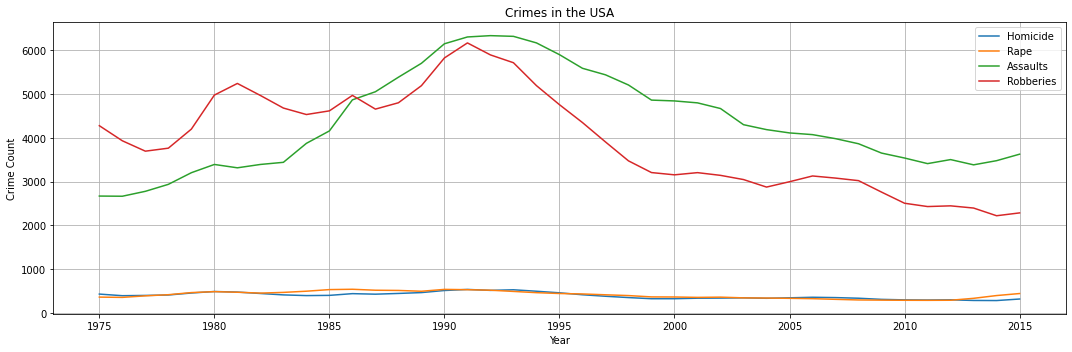

In [371]:
homi = df['homicides'].to_numpy()
rapes = df['rapes'].to_numpy()
assaults = df['assaults'].to_numpy()
robberies = df['robberies'].to_numpy()
year = df['report_year'].to_numpy()

plt.figure(figsize=(15,5))

sns.lineplot(x=year, y=homi, label='Homicide', ci=None)
sns.lineplot(x=year, y=rapes, label='Rape', ci=None)
sns.lineplot(x=year, y=assaults, label='Assaults', ci=None)
sns.lineplot(x=year, y=robberies, label='Robberies', ci=None)


plt.xlabel('Year')
plt.ylabel('Crime Count')

plt.title('Crimes in the USA')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()






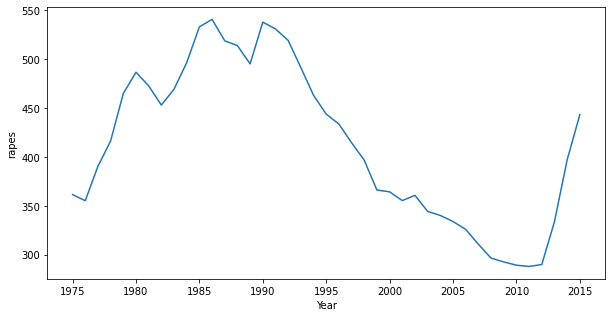

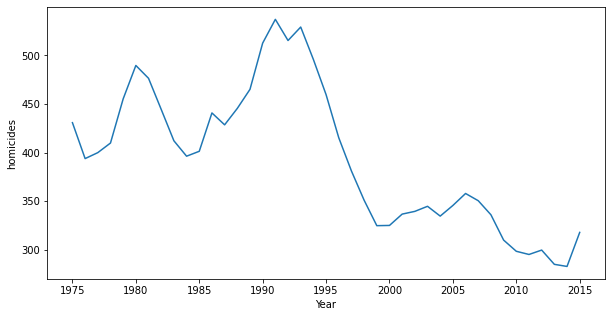

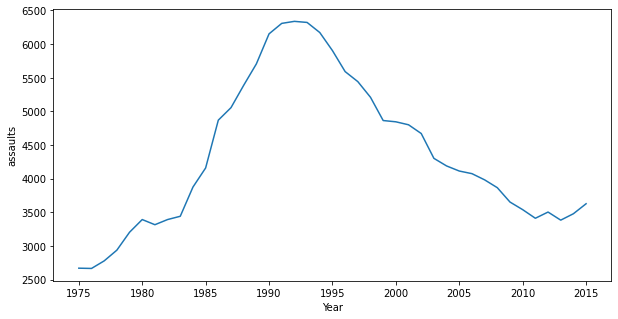

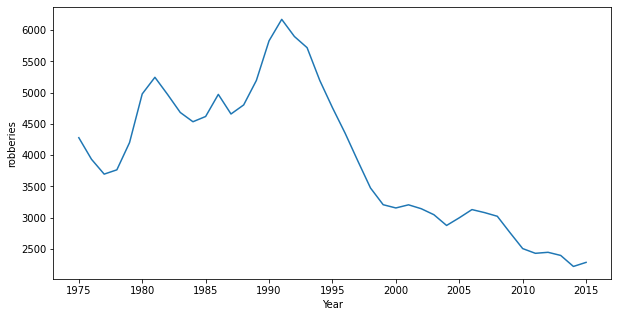

In [372]:
crimes = ['rapes', 'homicides', 'assaults', 'robberies']
for c in crimes:
  plt.figure(figsize=(10,5))
  axs= df.groupby('report_year')[c].mean().plot()
  axs.set_xlabel("Year")
  axs.set_ylabel(c)